<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

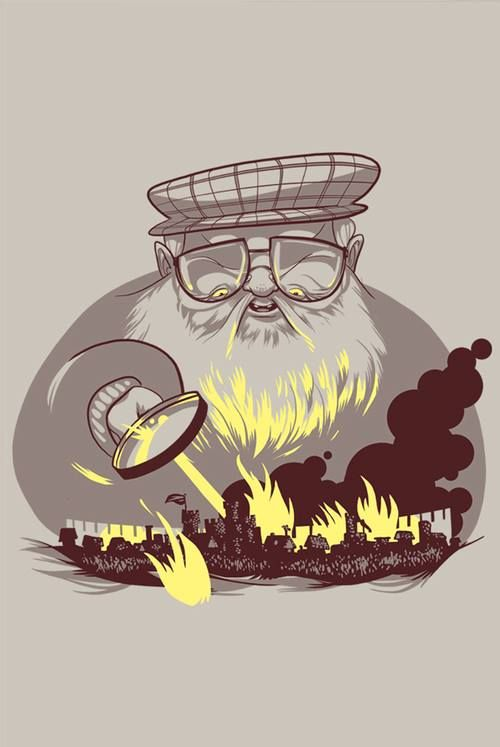

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [705]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 65.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 96.1MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [706]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [707]:
data = pd.read_csv("game_of_thrones_train.csv", index_col = "S.No")
data_test = pd.read_csv("game_of_thrones_test.csv", index_col = "S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [708]:
data = data.fillna({
    "heir": 0,
    "culture": "missing",
    "spouse": 0,
    "title": 0,
    "house": "missing",
    "mother": 0,
    "father": 0,
    "isAliveMother": 0,
    "isAliveFather": 0,
    "isAliveHeir": 0,
    "isAliveSpouse": 0,
    "dateOfBirth": data['dateOfBirth'].median(),
    "age": data['age'].median(),
})

data['title'] = data['title'].apply(lambda x: 1 if x != 0 else 0)
data['heir'] = data['heir'].apply(lambda x: 1 if x != 0 else 0)
data['spouse'] = data['spouse'].apply(lambda x: 1 if x != 0 else 0)

#Для тестовых данный делаем то же самое
data_test = data_test.fillna({
    "heir": 0,
    "culture": "missing",
    "spouse": 0,
    "title": 0,
    "house": "missing",
    "mother": 0,
    "father": 0,
    "isAliveMother": 0,
    "isAliveFather": 0,
    "isAliveHeir": 0,
    "isAliveSpouse": 0,
    "dateOfBirth": data_test['dateOfBirth'].median(),
    "age": data_test['age'].median(),
})

data_test['title'] = data_test['title'].apply(lambda x: 1 if x != 0 else 0)
data_test['heir'] = data_test['heir'].apply(lambda x: 1 if x != 0 else 0)
data_test['spouse'] = data_test['spouse'].apply(lambda x: 1 if x != 0 else 0)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [709]:
data["isPopular"] = data['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)
data["boolDeadRelations"] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

data_test["isPopular"] = data_test['popularity'].apply(lambda x: 1 if x >= 0.5 else 0)
data_test["boolDeadRelations"] = data_test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [710]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [711]:
inverse_cult = {value: key for key, values in cult.items() for value in values}

def map_culture(culture):
  if isinstance(culture, str):
    return inverse_cult.get(culture.lower(), culture)
  return culture

data['culture'] = data['culture'].apply(map_culture)

data_test['culture'] = data_test['culture'].apply(map_culture)


data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,0,1,missing,272.0,Rhaenyra Targaryen,Daemon Targaryen,1,missing,0,...,0.0,0.0,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,1,1,Rivermen,208.0,0,0,0,House Frey,1,...,0.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,1,1,missing,272.0,0,0,0,House Swyft,0,...,0.0,0.0,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,1,0,missing,82.0,0,0,0,House Arryn,1,...,0.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,1,0,Dornish,276.0,0,0,0,House Santagar,1,...,0.0,1.0,1,1,29.0,0,0.043478,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [712]:
data.drop(columns=["mother", "father", "name", "spouse", "title", "heir"], inplace = True)
data_test.drop(columns=["mother", "father", "name", "spouse", "title", "heir"], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

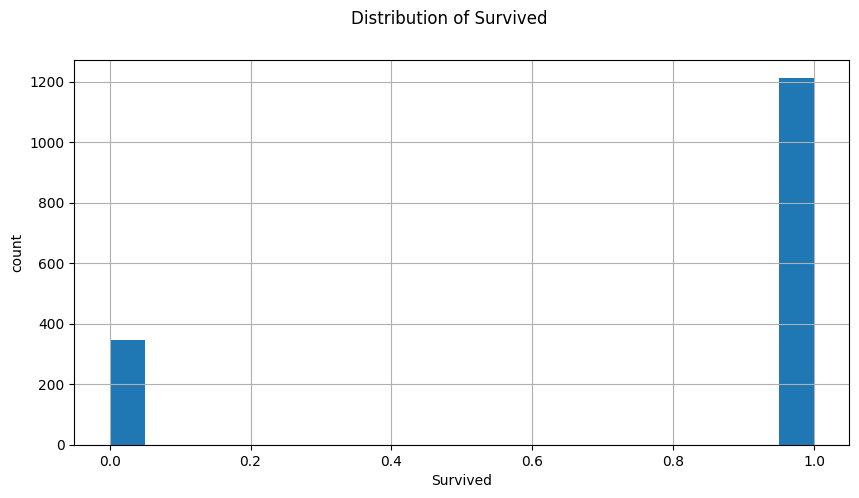

In [713]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Survived')

plt.suptitle('Distribution of Survived')
plt.show()

**Задание 1.7.** Проанализируйте признаки.

1.   Новый пункт
2.   Новый пункт


  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [714]:
categorical_columns = ["culture", "house"]

In [715]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

for column in categorical_columns:
  data[column] = label_encoding.fit_transform(data[column])
  data_test[column] = label_encoding.fit_transform(data_test[column])

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [716]:
data["isAlive"].value_counts()

,count
isAlive,
1,1212
0,345


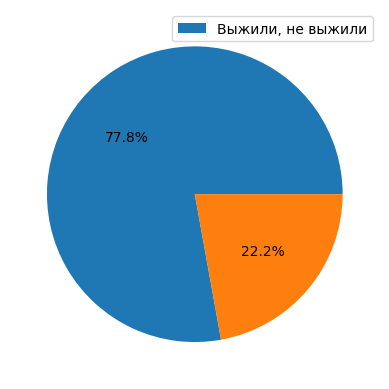

In [717]:
# Строим круговую диаграмму
plt.pie(data['isAlive'].value_counts(), autopct='%1.1f%%')

plt.legend(['Выжили, не выжили'])

plt.show()

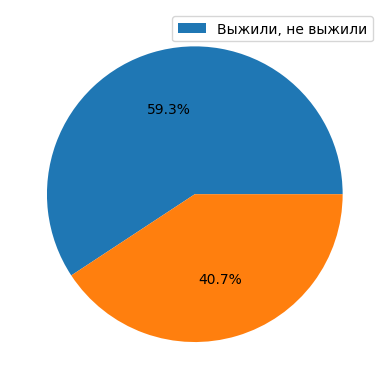

In [718]:
plt.pie(data[data['isPopular'] == 1]['isAlive'].value_counts(), autopct='%1.1f%%')

plt.legend(['Выжили, не выжили'])

plt.show()

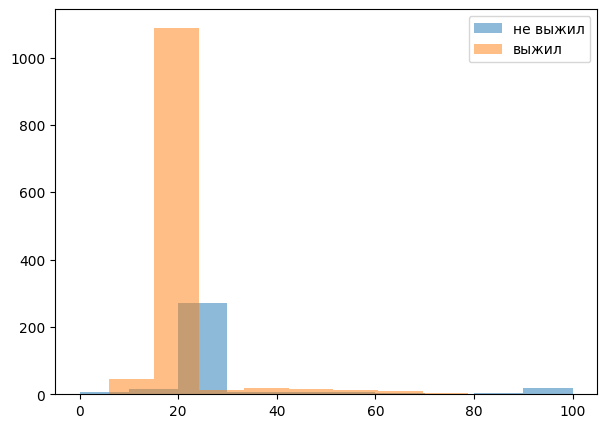

In [719]:
plt.figure(figsize=(7, 5))

plt.hist(data['age'][data['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(data['age'][data['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

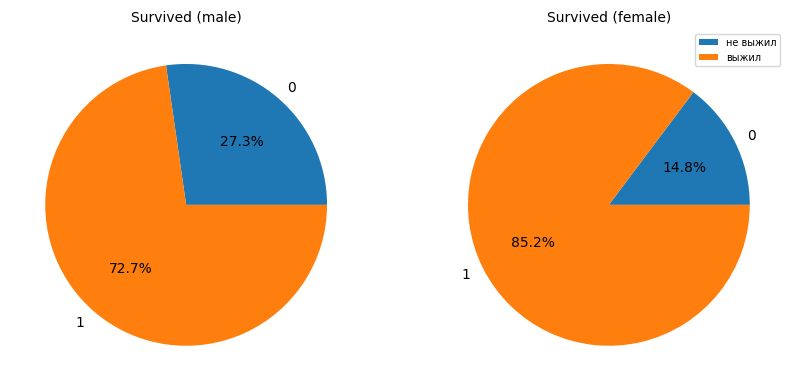

In [720]:
data_1 = data[data['male'] == 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['male'] == 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (male)', fontsize=10)
ax2.set_title('Survived (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()


Как можно заметить, выживаемость мужчин куда меньше, чем женщин

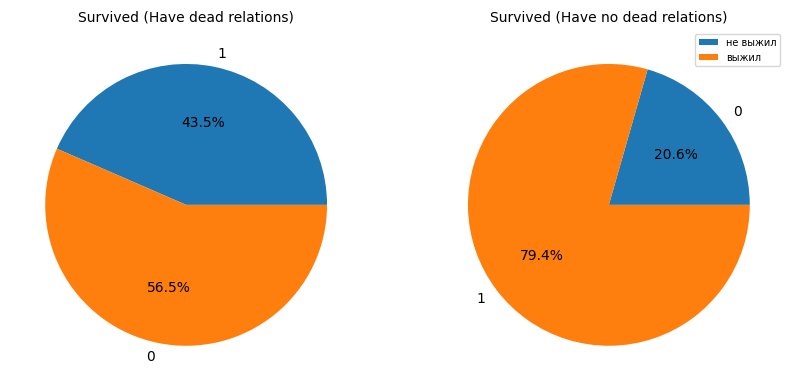

In [721]:
data_1 = data[data['boolDeadRelations'] == 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['boolDeadRelations'] == 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (Have dead relations)', fontsize=10)
ax2.set_title('Survived (Have no dead relations)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()


Видно, что герои, которые имеют отношение к мёртвым персонаж куда хуже выживают, чем те, которые не имеют

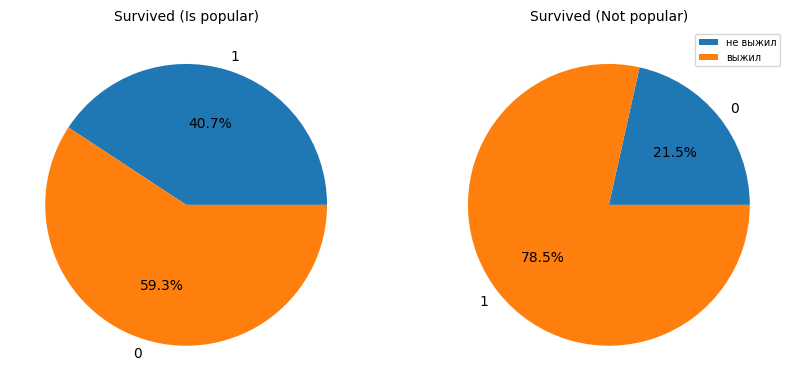

In [722]:
data_1 = data[data['isPopular'] == 1]['isAlive'].value_counts().sort_values()
data_2 = data[data['isPopular'] == 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (Is popular)', fontsize=10)
ax2.set_title('Survived (Not popular)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()


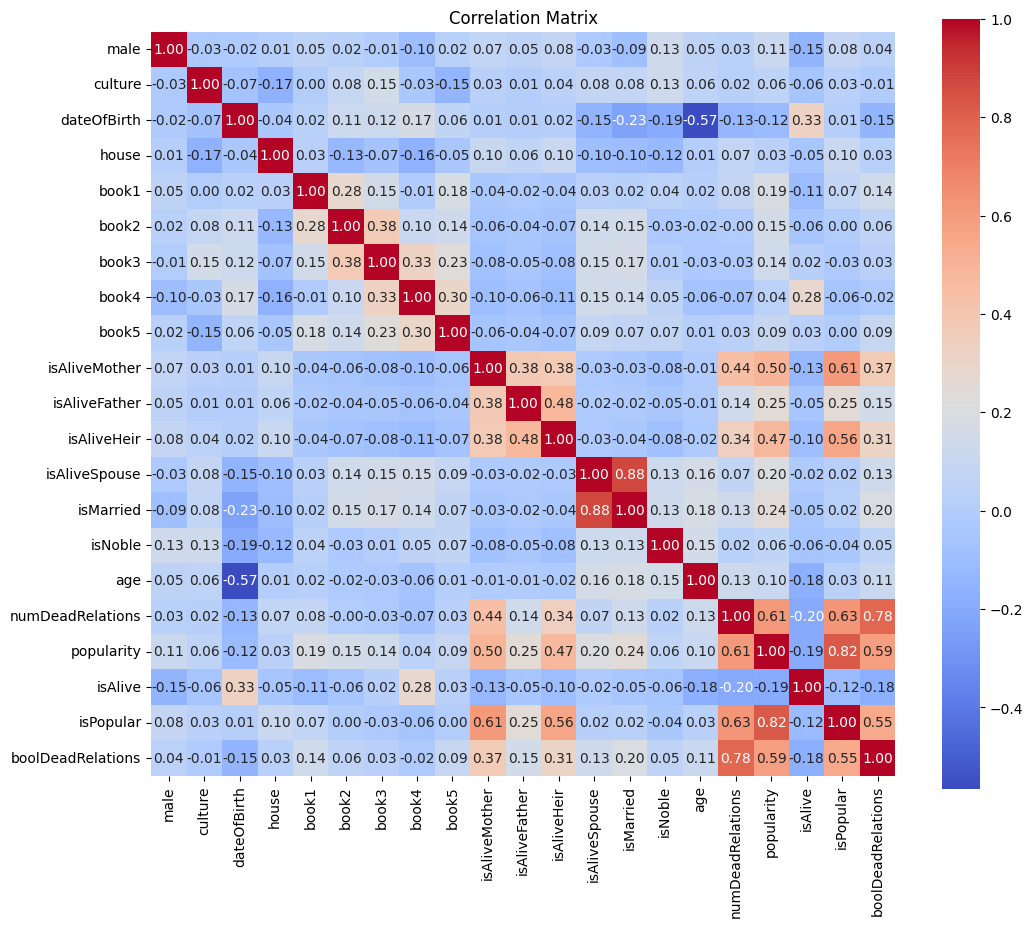

In [723]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [724]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [725]:
from sklearn.model_selection import train_test_split

In [726]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [727]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [728]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [729]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [730]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# Шаг 1. создание моделей и их гиперпараметров для Grid Search
models_and_params = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {"C": [0.1, 1, 10]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {"n_estimators": [10, 50, 100], "max_depth": [None, 10, 20]}
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "params": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 1]}
    },
    "Gaussian Process": {
        "model": GaussianProcessClassifier(),
        "params": {}
    },
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7]}
    },
    "SVC": {
        "model": SVC(probability=True),
        "params": {"C": [0.1, 1, 10], "gamma": ['scale', 'auto']}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {"max_depth": [None, 10, 20]}
    }
}

# Шаг 2. Оптимизация гиперпараметров с помощью GridSearchCV
best_models = {}
for name, model_info in models_and_params.items():
    grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

# Шаг 3. создание ансамбля голосования
voting_model = VotingClassifier(estimators=[(name, model) for name, model in best_models.items()], voting='soft')

# Обучение ансамбля
voting_model.fit(X_train, y_train)

# Шаг 4. Предсказание на тестовых данных
predictions = {}
for name, model in best_models.items():
    predictions[name] = model.predict(X_test)

# Предсказание с использованием ансамбля
predictions['Voting Ensemble'] = voting_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [731]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [732]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [733]:
best_models["Voting Ensamble"] = voting_model
accuracies = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Печать результатов
print("Accuracies:", accuracies)

# Выбор лучшей модели
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"Best Model: {best_model_name} with accuracy: {best_accuracy:.4f}")


Accuracies: {'Logistic Regression': 0.8108974358974359, 'Random Forest': 0.8237179487179487, 'AdaBoost': 0.8012820512820513, 'Gaussian Process': 0.8076923076923077, 'GaussianNB': 0.8108974358974359, 'KNN': 0.8173076923076923, 'SVC': 0.7948717948717948, 'Decision Tree': 0.8044871794871795, 'Voting Ensamble': 0.8301282051282052}
Best Model: Voting Ensamble with accuracy: 0.8301


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [734]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.61MB/s]


In [735]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [736]:
submission["isAlive"] = best_models["AdaBoost"].predict(data_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


Как сохранить измененный Pandas DataFrame в csv файл:

In [737]:
submission.to_csv("/content/new_submission.csv", index=False)